<a href="https://colab.research.google.com/github/sabriades/Machine_Learning_Model/blob/main/RF_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#adesso voglio eliminare tutti gli outliers, tranne quelli di tensile strain
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded=files.upload()

Saving NANOCOMPOSITES_DATASET_HERE.csv to NANOCOMPOSITES_DATASET_HERE.csv


In [3]:
nanocomposites_full=pd.read_csv('NANOCOMPOSITES_DATASET_HERE.csv')
nanocomposites_full.head(3)

,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Filler Geometry,Elastic Modulus matrix (MPa),Paper
0,Epoxy,GNP,0.2,3722.4,74.2,4.4,Graphene nanoplatelets (GNP),3554.7,26
1,Epoxy,GNP,0.4,3407.2,71.1,6.2,Graphene nanoplatelets (GNP),3554.7,26
2,Epoxy,MWCNT,0.2,3654.5,72.4,6.9,multi-walled carbon nanotubes (MWCNT),3554.7,26


In [4]:
nanocomposites=nanocomposites_full.drop(['Paper','Filler Geometry'], axis=1)

In [ ]:
nanocomposites.head(3)

,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
0,Epoxy,GNP,0.2,3722.4,74.2,4.4,3554.7
1,Epoxy,GNP,0.4,3407.2,71.1,6.2,3554.7
2,Epoxy,MWCNT,0.2,3654.5,72.4,6.9,3554.7


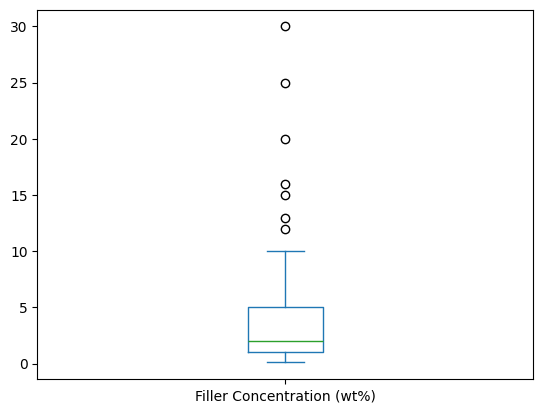

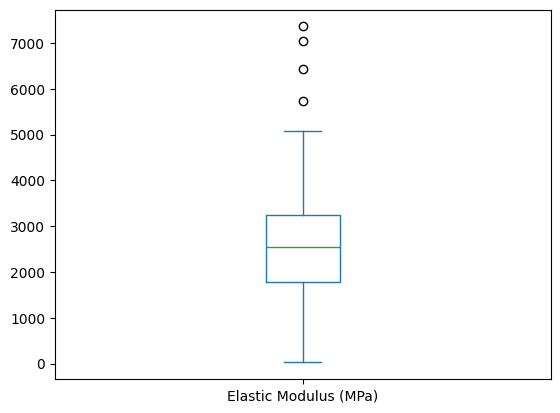

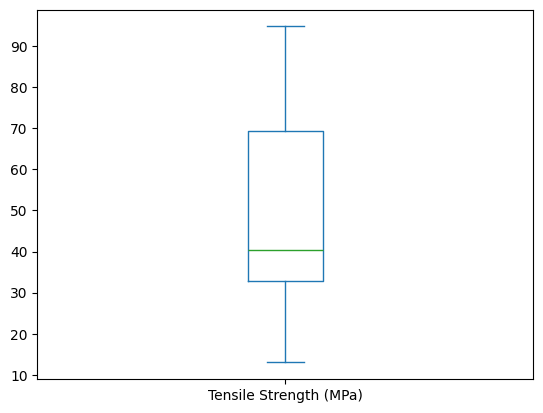

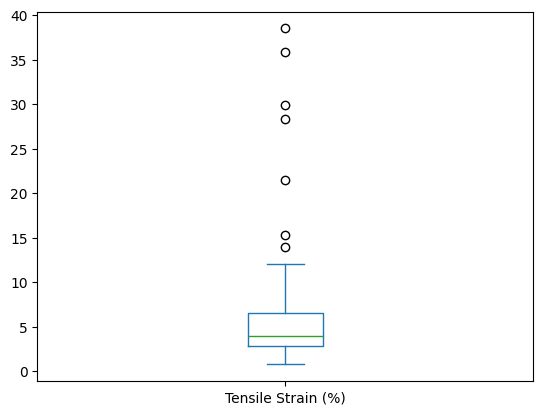

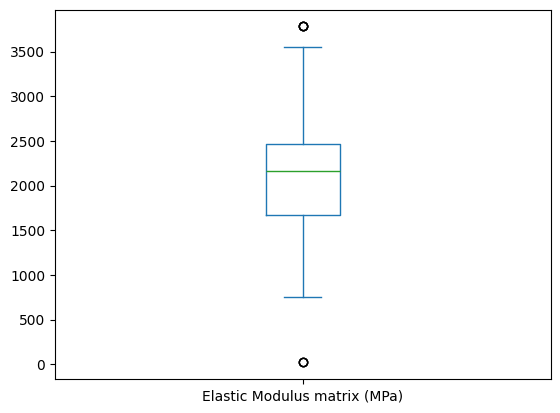

In [5]:
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler']:
    nanocomposites[[colonna]].plot(kind='box')

In [6]:
outliers_dict={}
outliers_idx=[]
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler']:
    Q1=nanocomposites[colonna].quantile(0.25)
    Q3=nanocomposites[colonna].quantile(0.75)
    IQR=Q3-Q1
    limite_basso=Q1-1.5*IQR
    limite_alto=Q3+1.5*IQR
    outliers_all=nanocomposites[(nanocomposites[colonna]<limite_basso) | (nanocomposites[colonna]>limite_alto)]
    outliers_index=nanocomposites[(nanocomposites[colonna]<limite_basso) | (nanocomposites[colonna]>limite_alto)].index
    outliers_idx.append(outliers_index)
    outliers_dict[colonna]=outliers_all

In [7]:
outliers_idx

[Index([18, 19, 81, 107, 108, 109, 110], dtype='int64'),
 Index([15, 16, 109, 110], dtype='int64'),
 Index([], dtype='int64'),
 Index([44, 45, 46, 47, 48, 49, 76], dtype='int64'),
 Index([40, 41, 42, 43, 50, 51, 52], dtype='int64')]

In [8]:
total_outliers=sum(len(sotto_gruppo) for sotto_gruppo in outliers_idx)
print(total_outliers)

25


In [9]:
for colonna in nanocomposites:
  if colonna not in ['Polymer Matrix', 'Filler','Tensile Strength (MPa)']:
    print("outliers di: "+colonna)
    display(outliers_dict[colonna])

outliers di: Filler Concentration (wt%)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
18,Epoxy,Nanosilica,13.0,3330.0,85.25,3.62,2750.0
19,Epoxy,Nanosilica,25.0,3800.0,88.11,3.52,2750.0
81,ABS,MWCNT,15.0,2917.3,22.00,1.80,2159.8
107,ABS,GNP,12.0,4450.0,42.40,2.50,2315.0
108,ABS,GNP,16.0,5072.0,41.60,2.00,2315.0
109,ABS,GNP,20.0,5725.0,42.90,1.90,2315.0
110,ABS,GNP,30.0,7362.0,44.30,1.30,2315.0


outliers di: Elastic Modulus (MPa)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
15,ABS,SWCNT,7.5,6434.0,40.5,2.6,2278.0
16,ABS,SWCNT,10.0,7045.0,40.3,1.8,2278.0
109,ABS,GNP,20.0,5725.0,42.9,1.9,2315.0
110,ABS,GNP,30.0,7362.0,44.3,1.3,2315.0


outliers di: Tensile Strain (%)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
44,PET,TiO₂,1.0,2486.1,28.30,21.50,2467.2
45,PET,TiO₂,3.0,2561.3,30.70,28.30,2467.2
46,PET,TiO₂,5.0,2572.8,36.90,15.30,2467.2
47,PLA,TiO₂,1.0,1710.0,26.33,29.86,1840.0
48,PLA,TiO₂,3.0,1780.0,25.14,38.50,1840.0
49,PLA,TiO₂,5.0,1660.0,23.47,35.82,1840.0
76,ABS,MWCNT,1.0,2169.1,26.90,14.00,2159.8


outliers di: Elastic Modulus matrix (MPa)


,Polymer Matrix,Filler,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
40,Epoxy,MWCNT,0.1,2823.00,42.24,1.40,3782.00
41,Epoxy,MWCNT,0.2,3345.00,62.56,1.96,3782.00
42,Epoxy,MWCNT,0.3,3680.00,63.04,2.52,3782.00
43,Epoxy,MWCNT,0.4,3684.00,28.00,0.76,3782.00
50,PET,Clay,1.0,23.93,45.00,2.07,19.59
51,PET,Clay,3.0,28.14,51.79,2.01,19.59
52,PET,Clay,5.0,25.89,41.55,1.73,19.59


In [10]:
nanocomposites.shape

(115, 7)

In [11]:
outliers_idx

[Index([18, 19, 81, 107, 108, 109, 110], dtype='int64'),
 Index([15, 16, 109, 110], dtype='int64'),
 Index([], dtype='int64'),
 Index([44, 45, 46, 47, 48, 49, 76], dtype='int64'),
 Index([40, 41, 42, 43, 50, 51, 52], dtype='int64')]

In [12]:
outliers_idx.pop(3)

Index([44, 45, 46, 47, 48, 49, 76], dtype='int64')

In [13]:
outliers_idx

[Index([18, 19, 81, 107, 108, 109, 110], dtype='int64'),
 Index([15, 16, 109, 110], dtype='int64'),
 Index([], dtype='int64'),
 Index([40, 41, 42, 43, 50, 51, 52], dtype='int64')]

In [14]:
list_idx_outliers=[indice for sotto_lista in outliers_idx for indice in sotto_lista]
print(list_idx_outliers)

[18, 19, 81, 107, 108, 109, 110, 15, 16, 109, 110, 40, 41, 42, 43, 50, 51, 52]


In [15]:
len(list_idx_outliers)

18

In [16]:
len(nanocomposites)

115

In [17]:
nanocomposites_clean_out=nanocomposites.drop(list_idx_outliers)
nanocomposites_clean_out.shape

(99, 7)

In [18]:
for i in range(len(list_idx_outliers)):
  for j in range(i+1,len(list_idx_outliers)):
     if list_idx_outliers[i]==list_idx_outliers[j]:
      print('si ripetono gli outlier con indici: '+str(list_idx_outliers[i]))

si ripetono gli outlier con indici: 109
si ripetono gli outlier con indici: 110


In [19]:
nanocomposites_clean_encoded=pd.get_dummies(nanocomposites_clean_out)
nanocomposites_clean_encoded.head(3)

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,...,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
0,0.2,3722.4,74.2,4.4,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,0.4,3407.2,71.1,6.2,3554.7,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,0.2,3654.5,72.4,6.9,3554.7,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [20]:
nanocomposites_clean_encoded.shape

(99, 21)

In [ ]:
#nanocomposites_clean_encoded[(nanocomposites_clean_encoded['Tensile Strain (%)']>36)]

In [ ]:
#aggiunta dopo
#nanocomposites_clean_encoded=nanocomposites_clean_encoded.drop([48])

In [21]:
nanocomposites_clean_encoded.columns

Index(['Filler Concentration (wt%)', 'Elastic Modulus (MPa)',
       'Tensile Strength (MPa)', 'Tensile Strain (%)',
       'Elastic Modulus matrix (MPa)', 'Polymer Matrix_ABS',
       'Polymer Matrix_Epoxy', 'Polymer Matrix_PET', 'Polymer Matrix_PLA',
       'Polymer Matrix_PMMA', 'Filler_Clay', 'Filler_GNP', 'Filler_GNS',
       'Filler_GO', 'Filler_MWCNT', 'Filler_Nanosilica', 'Filler_SWCNT',
       'Filler_Silica', 'Filler_TiO₂', 'Filler_h-BN', 'Filler_rGO'],
      dtype='object')

In [22]:
X=nanocomposites_clean_encoded[['Filler Concentration (wt%)','Elastic Modulus matrix (MPa)','Polymer Matrix_ABS',
       'Polymer Matrix_Epoxy', 'Polymer Matrix_PET', 'Polymer Matrix_PLA',
       'Polymer Matrix_PMMA', 'Filler_Clay', 'Filler_GNP', 'Filler_GNS',
       'Filler_GO', 'Filler_MWCNT', 'Filler_Nanosilica', 'Filler_SWCNT',
       'Filler_Silica', 'Filler_TiO₂', 'Filler_h-BN', 'Filler_rGO']]
y=nanocomposites_clean_encoded[['Elastic Modulus (MPa)','Tensile Strength (MPa)', 'Tensile Strain (%)']]

In [ ]:
X.head(3)

,Filler Concentration (wt%),Elastic Modulus matrix (MPa),Polymer Matrix_ABS,Polymer Matrix_Epoxy,Polymer Matrix_PET,Polymer Matrix_PLA,Polymer Matrix_PMMA,Filler_Clay,Filler_GNP,Filler_GNS,Filler_GO,Filler_MWCNT,Filler_Nanosilica,Filler_SWCNT,Filler_Silica,Filler_TiO₂,Filler_h-BN,Filler_rGO
0,0.2,3554.7,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,0.4,3554.7,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,0.2,3554.7,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
y.head(3)

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
0,3722.4,74.2,4.4
1,3407.2,71.1,6.2
2,3654.5,72.4,6.9


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
len(y_train)

79

In [25]:
len(y_test)

20

In [26]:
display(y_test.index)

Index([73, 48, 111, 22, 113, 96, 75, 53, 10, 0, 35, 88, 58, 30, 55, 4, 26, 12,
       100, 85],
      dtype='int64')

In [29]:
model=RandomForestRegressor(n_estimators=500,max_features='sqrt', random_state=42, oob_score=True)

In [30]:
rf=model.fit(X_train,y_train)

In [31]:
rf.oob_score_

0.764330304176405

In [32]:
pred_properties_clean=rf.predict(X_test)

In [33]:
mae=mean_absolute_error(y_true=y_test, y_pred=pred_properties_clean)
print('MAE: '+str(mae))

MAE: 77.33198708329765


In [34]:
mse=mean_squared_error(y_true=y_test, y_pred=pred_properties_clean)
rmse=math.sqrt(mse)
print('RMSE: '+str(rmse))

RMSE: 153.59115756612294


In [35]:
r2=rf.score(X_test, y_test)
print('R2: '+str(r2))

R2: 0.8430760370453537


In [36]:
pred_properties_clean_df=pd.DataFrame(pred_properties_clean, columns=y_test.columns, index=y_test.index)

In [37]:
pred_properties_clean_df.head(3)

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
73,2063.692002,32.068894,4.972764
48,1741.076183,30.638514,24.634533
111,2673.142611,39.377384,4.736659


In [38]:
for colonna in pred_properties_clean_df:
  mae_each_target=mean_absolute_error(y_true=y_test[colonna], y_pred=pred_properties_clean_df[colonna])
  mse_each_target=mean_squared_error(y_true=y_test[colonna], y_pred=pred_properties_clean_df[colonna])
  rmse_each_target=math.sqrt(mse_each_target)
  r2_each_target=r2_score(y_true=y_test[colonna], y_pred=pred_properties_clean_df[colonna])
  print('Colonna: '+colonna)
  print('MAE di '+colonna+' : '+str(mae_each_target))
  print('RMSE di '+colonna+' : '+str(rmse_each_target))
  print('R2 di '+colonna+' : '+str(r2_each_target)) #potrebbe valere la pena plottare una matrice di correlazione

Colonna: Elastic Modulus (MPa)
MAE di Elastic Modulus (MPa) : 222.7149505202032
RMSE di Elastic Modulus (MPa) : 265.84011853842503
R2 di Elastic Modulus (MPa) : 0.894472052607968
Colonna: Tensile Strength (MPa)
MAE di Tensile Strength (MPa) : 7.292096424819656
RMSE di Tensile Strength (MPa) : 9.356633627172547
R2 di Tensile Strength (MPa) : 0.8392793055115074
Colonna: Tensile Strain (%)
MAE di Tensile Strain (%) : 1.988914304870128
RMSE di Tensile Strain (%) : 3.4951151837654297
R2 di Tensile Strain (%) : 0.7954767530165856


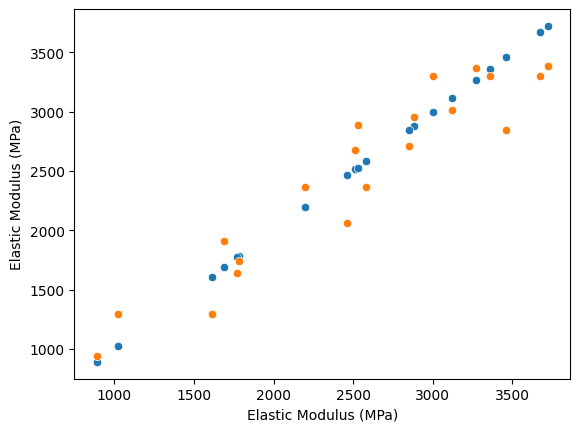

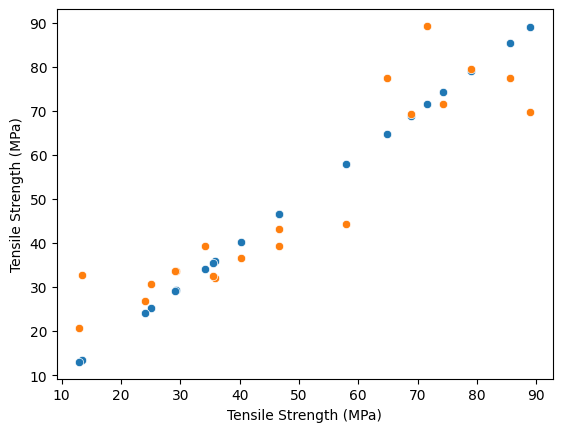

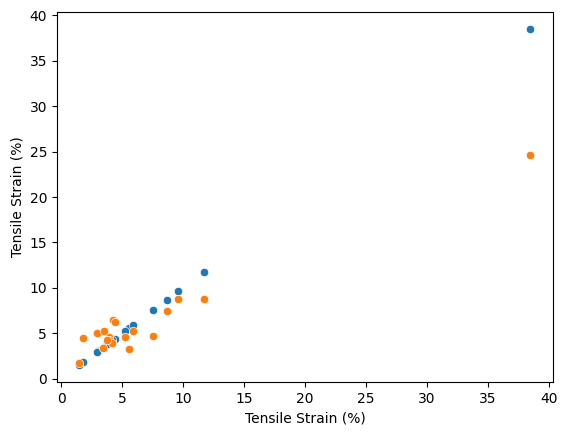

In [ ]:
for colonna in pred_properties_clean_df:
  fig,ax=plt.subplots()
  sns.scatterplot(x=y_test[colonna],y=y_test[colonna], ax=ax)
  sns.scatterplot(x=y_test[colonna],y=pred_properties_clean_df[colonna], ax=ax)

In [ ]:
nanocomposites.shape
nanocomposites.dtypes

,0
Polymer Matrix,object
Filler,object
Filler Concentration (wt%),float64
Elastic Modulus (MPa),float64
Tensile Strength (MPa),float64
Tensile Strain (%),float64
Elastic Modulus matrix (MPa),float64


In [ ]:
nanocomposites_num=nanocomposites.select_dtypes(include=['float'])

In [ ]:
nanocomposites_num.head(3)

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
0,0.2,3722.4,74.2,4.4,3554.7
1,0.4,3407.2,71.1,6.2,3554.7
2,0.2,3654.5,72.4,6.9,3554.7


In [ ]:
corr=nanocomposites_num.corr()
corr

,Filler Concentration (wt%),Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%),Elastic Modulus matrix (MPa)
Filler Concentration (wt%),1.000000,0.539198,-0.101270,-0.150815,0.049793
Elastic Modulus (MPa),0.539198,1.000000,0.194199,-0.149915,0.692744
Tensile Strength (MPa),-0.101270,0.194199,1.000000,-0.084153,0.355107
Tensile Strain (%),-0.150815,-0.149915,-0.084153,1.000000,0.009167
Elastic Modulus matrix (MPa),0.049793,0.692744,0.355107,0.009167,1.000000


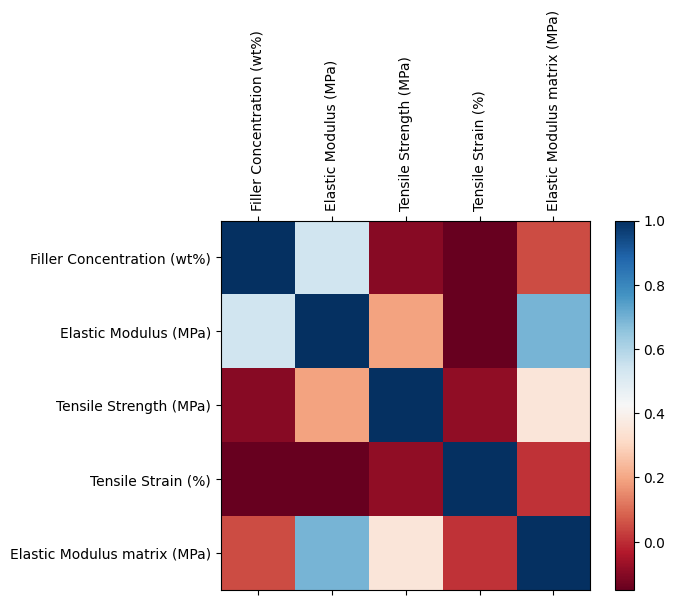

In [ ]:
fig,ax=plt.subplots()
cax=ax.matshow(corr, cmap='RdBu')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar(cax)
plt.show()

In [ ]:
nanocomposites_clean_encoded.columns

Index(['Filler Concentration (wt%)', 'Elastic Modulus (MPa)',
       'Tensile Strength (MPa)', 'Tensile Strain (%)',
       'Elastic Modulus matrix (MPa)', 'Polymer Matrix_ABS',
       'Polymer Matrix_Epoxy', 'Polymer Matrix_PET', 'Polymer Matrix_PLA',
       'Polymer Matrix_PMMA', 'Filler_Clay', 'Filler_GNP', 'Filler_GNS',
       'Filler_GO', 'Filler_MWCNT', 'Filler_Nanosilica', 'Filler_SWCNT',
       'Filler_Silica', 'Filler_TiO₂', 'Filler_h-BN', 'Filler_rGO'],
      dtype='object')

In [ ]:
#new sample

new_sample_prova=pd.DataFrame({'Filler Concentration (wt%)': [2],
                        #'Elastic Modulus (MPa)': [],
                         #'Tensile Strength (MPa)': [],
                         #'Tensile Strain (%)': [],
                         'Elastic Modulus matrix (MPa)': [2000],
                         'Polymer Matrix_ABS': [1],
                         'Polymer Matrix_Epoxy': [0],
                         'Polymer Matrix_PET': [0],
                         'Polymer Matrix_PLA': [0],
                         'Polymer Matrix_PMMA': [0],
                         'Filler_Clay': [0],
                         'Filler_GNP': [1],
                         'Filler_GNS': [0],
                         'Filler_GO': [0],
                         'Filler_MWCNT': [0],
                         'Filler_Nanosilica': [0],
                         'Filler_SWCNT': [0],
                         'Filler_Silica': [0],
                         'Filler_TiO₂': [0],
                         'Filler_h-BN': [0],
                         'Filler_rGO': [0]
})

In [ ]:
prediction=rf.predict(new_sample_prova)
print("Predizione di Elastic Modulus, Tensile Strength, Tensile Strain:")
print(prediction)

Predizione di Elastic Modulus, Tensile Strength, Tensile Strain:
[[2133.24603703   34.43206497    8.25903683]]


In [ ]:
#pred_properties_clean_df=pd.DataFrame(pred_properties_clean, columns=y_test.columns, index=y_test.index)
new_sample_prediction_df=pd.DataFrame(prediction,columns=y_test.columns, index=new_sample_prova.index)

In [ ]:
new_sample_prediction_df

,Elastic Modulus (MPa),Tensile Strength (MPa),Tensile Strain (%)
0,2133.246037,34.432065,8.259037


vedo solo ABS+GNP

In [39]:
nanocomposites_clean_encoded.columns

Index(['Filler Concentration (wt%)', 'Elastic Modulus (MPa)',
       'Tensile Strength (MPa)', 'Tensile Strain (%)',
       'Elastic Modulus matrix (MPa)', 'Polymer Matrix_ABS',
       'Polymer Matrix_Epoxy', 'Polymer Matrix_PET', 'Polymer Matrix_PLA',
       'Polymer Matrix_PMMA', 'Filler_Clay', 'Filler_GNP', 'Filler_GNS',
       'Filler_GO', 'Filler_MWCNT', 'Filler_Nanosilica', 'Filler_SWCNT',
       'Filler_Silica', 'Filler_TiO₂', 'Filler_h-BN', 'Filler_rGO'],
      dtype='object')

In [40]:
mask_abs_gnp=(X_test["Polymer Matrix_ABS"]==1) & (X_test["Filler_GNP"]==1)

In [41]:
X_test_abs_gnp=X_test[mask_abs_gnp]
y_test_abs_gnp=y_test.loc[mask_abs_gnp]

In [42]:
y_pred_abs_gnp=model.predict(X_test_abs_gnp)

In [43]:
mae=mean_absolute_error(y_test_abs_gnp,y_pred_abs_gnp)
rmse=np.sqrt(mean_squared_error(y_test_abs_gnp,y_pred_abs_gnp))
r2=r2_score(y_test_abs_gnp,y_pred_abs_gnp)
print("Valutazione SOLO su ABS+GNP:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

Valutazione SOLO su ABS+GNP:
MAE: 81.57480276369135
RMSE: 147.33012941960155
R2: 0.3637918265675107
